In [ ]:
# @title import library

import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import pickle
import time

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle



In [ ]:
# @title import drive
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# @title load dataset
train_dir = "/content/drive/MyDrive/pizzaa_or_notpizza/training"
test_dir = "/content/drive/MyDrive/pizzaa_or_notpizza/test"

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

test_datagen = ImageDataGenerator(rescale=1./255)


train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)

Found 100 images belonging to 2 classes.
Found 100 images belonging to 2 classes.


In [ ]:
print(train_generator.class_indices)


{'notpizza': 0, 'pizza': 1}


In [ ]:
# @title Model
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(64, (3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(2,2),

    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),

    Flatten(),
    Dense(512, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

# Compile model
model.compile(
    loss='binary_crossentropy',
    optimizer=Adam(learning_rate=0.0001),
    metrics=['accuracy']
)

# Training model
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=test_generator
)

Epoch 1/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 20s 3s/step - accuracy: 0.5035 - loss: 2.6642 - val_accuracy: 0.5000 - val_loss: 0.7015
Epoch 2/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 4s/step - accuracy: 0.4578 - loss: 5.1658 - val_accuracy: 0.5000 - val_loss: 0.6893
Epoch 3/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.5207 - loss: 2.6087 - val_accuracy: 0.5800 - val_loss: 0.6816
Epoch 4/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 12s 3s/step - accuracy: 0.6489 - loss: 1.5437 - val_accuracy: 0.6300 - val_loss: 0.6805
Epoch 5/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.5101 - loss: 1.3812 - val_accuracy: 0.5000 - val_loss: 0.6880
Epoch 6/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.4710 - loss: 1.7910 - val_accuracy: 0.5700 - val_loss: 0.6786
Epoch 7/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 13s 4s/step - accuracy: 0.6639 - loss: 0.9782 - val_accuracy: 0.6600 - val_loss: 0.6762
Epoch 8/10
4/4 ━━━━━━━━━━━━━━━━━━━━ 14s 4s/step - accuracy: 0.6405 - loss: 1.0563 - val_accuracy: 0.5000 - val_loss: 0.6824
Epoch 9/

In [ ]:
# @title evaluasi model
loss, acc = model.evaluate(test_generator)
print(f"Test Accuracy: {acc * 100:.2f}%")

4/4 ━━━━━━━━━━━━━━━━━━━━ 2s 365ms/step - accuracy: 0.6015 - loss: 0.6740
Test Accuracy: 60.00%


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.11/dist-packages/matplotlib/pyplot.py'>

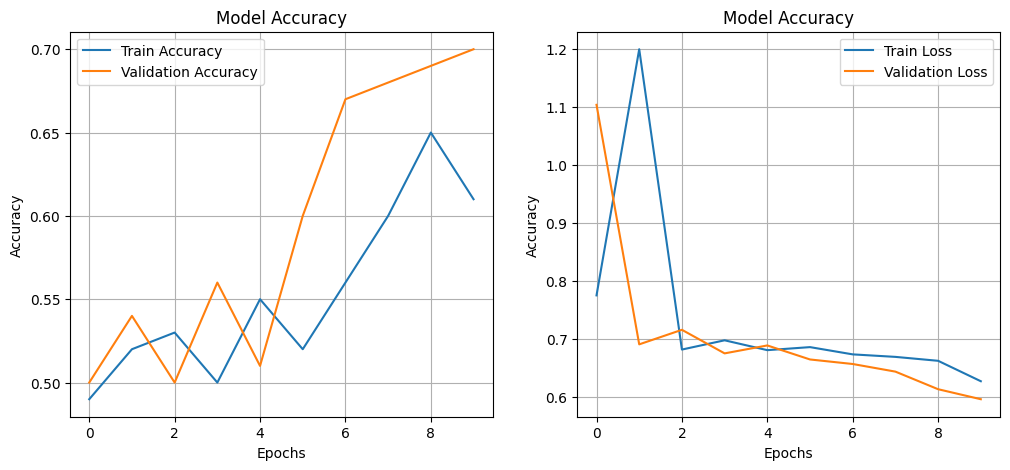

In [ ]:
# @title grafik hasil training
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title("Model Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.grid(True)
plt




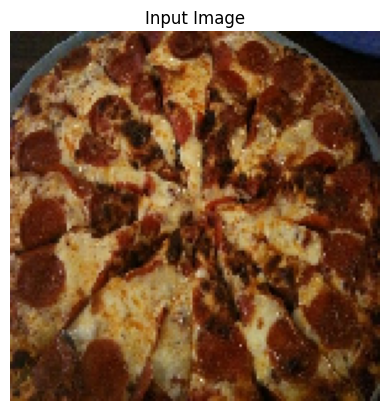

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 106ms/step
Prediction: Pizza


In [ ]:



img_path = "/content/drive/MyDrive/pizzaa_or_notpizza/All/105910.jpg"


img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0


plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()

# Prediksi
prediction = model.predict(img_array)
print("Prediction:", "Pizza" if prediction[0][0] > 0.5 else "Not Pizza")


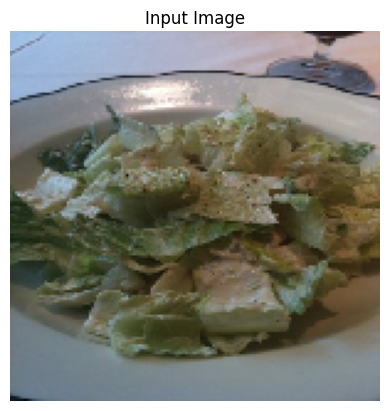

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Prediction: Not Pizza


In [ ]:

img_path = "/content/drive/MyDrive/pizzaa_or_notpizza/All/98656.jpg"

# Preprocessing gambar
img = image.load_img(img_path, target_size=(150, 150))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0)
img_array /= 255.0

plt.imshow(img)
plt.axis("off")
plt.title("Input Image")
plt.show()


prediction = model.predict(img_array)
print("Prediction:", "Pizza" if prediction[0][0] > 0.5 else "Not Pizza")